In [1]:
import numpy as np 
import scipy.linalg as la 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from  PIL import Image
%matplotlib inline 

(284, 177)


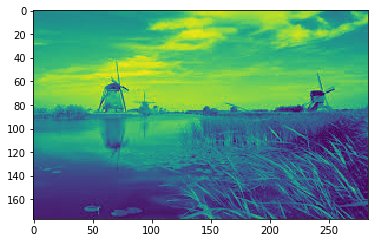

In [2]:
path ="test.jpg"
images_array = Image.open(path,mode ="r" )
array_l  = images_array.convert("L")  # 转化成灰度图
print ( array_l.size)
plt.imshow(array_l)

In [3]:
images = np.array(array_l )
print (images.shape) 
print (images)

(177, 284)
[[117 117 117 ... 120 115 116]
 [117 117 117 ... 127 123 124]
 [118 118 118 ... 145 144 147]
 ...
 [ 21  21  21 ...  15   2   2]
 [ 20  20  20 ...  24  20   5]
 [ 19  19  19 ...  23  21   9]]


In [22]:
def get_image_feature(s, k):
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0]) 
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    return temp


In [23]:
# svd 提取特征
p ,s ,q = la.svd( images ,full_matrices=  False) 

In [24]:
n = len(s)
k1 = n //100 
k2 = n //10 
k3  = n//2
temp1  = get_image_feature(s, k1)
temp2 = get_image_feature(s, k2)
temp3 = get_image_feature(s, k3)


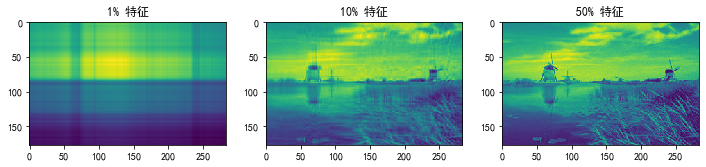

In [25]:
fig =  plt.figure( figsize= (12,9))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1,3,1)
plt.title("1% 特征")
plt.imshow(temp1)
plt.subplot(1,3,2)
plt.title("10% 特征")
plt.imshow(temp2)
plt.subplot(1,3,3)
plt.title("50% 特征")
plt.imshow(temp3)